In [0]:
#Teste de hipóteses

from google.colab import files
files.upload()

Saving student-mat.csv to student-mat (1).csv


{'student-mat.csv': b'school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3\nGP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6\nGP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6\nGP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10\nGP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15\nGP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10\nGP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15\nGP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11\nGP,F,17,U,GT3

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('student-mat.csv')
df=df[df.G3 != 0]

In [0]:
Novadf=df[['sex', 'G3']]

In [0]:
Novadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 2 columns):
sex    357 non-null object
G3     357 non-null int64
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


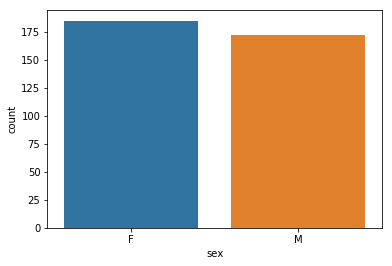

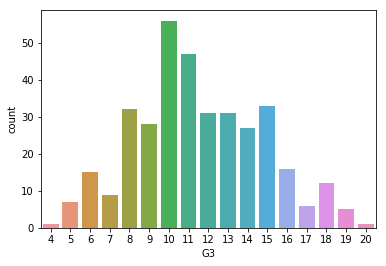

In [0]:
for colunas in Novadf.columns:
    sns.countplot(colunas, data = Novadf)
    plt.show()

In [0]:
Novadf.describe()

,G3
count,357.000000
mean,11.523810
std,3.227797
min,4.000000
25%,9.000000
50%,11.000000
75%,14.000000
max,20.000000


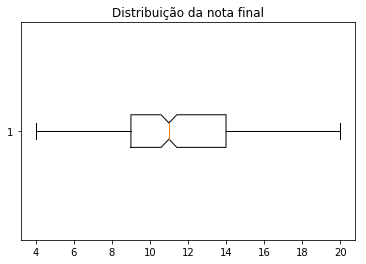

In [0]:
#Diagrama caixa de bigodes – Notas
plt.figure()
plt.boxplot(df['G3'], notch=True, vert=False)
plt.title('Distribuição da nota final')
plt.show()

Text(0.5, 1.0, 'Distributição de notas em pessoas do sexo Masculino ')

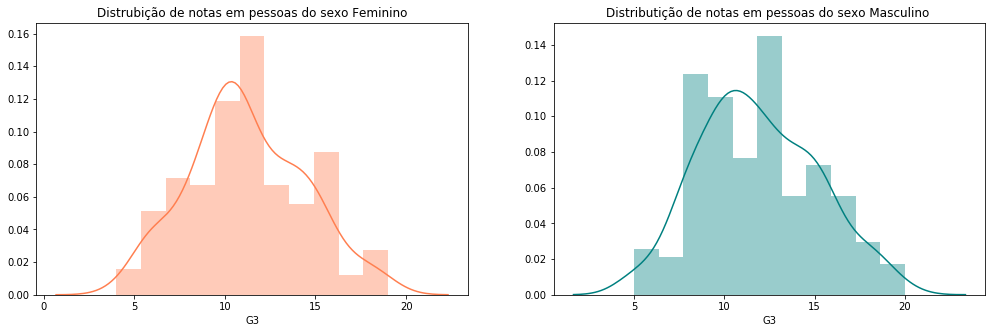

In [0]:

# Histogramas com curva de distribuição 

grafico= plt.figure(figsize=(17,5))

ax=grafico.add_subplot(121)
sns.distplot(Novadf[(Novadf.sex == 'F')]["G3"],color='coral',ax=ax)
ax.set_title('Distrubição de notas em pessoas do sexo Feminino')

ax=grafico.add_subplot(122)
sns.distplot(Novadf[(Novadf.sex == 'M')]['G3'],color='teal',ax=ax)
ax.set_title('Distributição de notas em pessoas do sexo Masculino ')

Text(0.5, 0, 'Notas')

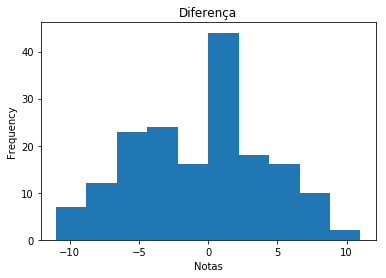

In [0]:
dif = feminino['G3'] - masculino['G3']
dif.plot(kind= "hist", title= "Diferença")
plt.xlabel("Notas")



In [0]:

feminino = Novadf[(Novadf['sex'] == 'F')]
feminino.reset_index(inplace= True)

masculino = Novadf[(Novadf['sex'] == 'M')]
masculino.reset_index(inplace= True)



In [0]:
feminino

,index,sex,G3
0,0,F,6
1,1,F,6
2,2,F,10
3,3,F,15
4,4,F,10
5,7,F,6
6,10,F,9
7,11,F,12
8,15,F,14
9,16,F,14


In [0]:
#Teste levene
from scipy import stats
stats.levene(feminino['G3'], masculino['G3'])

LeveneResult(statistic=0.6144552033049334, pvalue=0.4336379490863752)

In [0]:
#Teste de hipoteses usando scipy.stats

stats.ttest_ind(feminino['G3'], masculino['G3'])




Ttest_indResult(statistic=-1.9404771273257526, pvalue=0.053113174845791505)

In [0]:
#Teste t independente usando researchp
pip install  researchpy 


In [0]:
import researchpy as rp
descriptives, results = rp.ttest(feminino['G3'], masculino['G3'])

In [0]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,G3,185.0,11.205405,3.174452,0.233390,10.744940,11.665871
1,G3,172.0,11.866279,3.258748,0.248477,11.375801,12.356757
2,combined,357.0,11.523810,3.227797,0.170833,11.187841,11.859778


In [0]:
results

,Independent t-test,results
0,Difference (G3 - G3) =,-0.6609
1,Degrees of freedom =,355.0000
2,t =,-1.9405
3,Two side test p value =,0.0531
4,Mean of G3 > mean of G3 p value =,0.0266
5,Mean of G3 < mean of G3 p value =,0.9734
6,Cohen's d =,-0.2055
7,Hedge's g =,-0.2051
8,Glass's delta =,-0.2082
9,r =,0.1024
